# Exploratory Data Analysis (EDA) of the 500k English Song Lyrics Dataset

## TO DO:

- Controllo dati, ovvero check che non ci siano duplicati
- Plot (istogramma) delle frequenze delle lunghezze delle parole per topic (cioè parole di 4 lettere magari sono più frequenti nei docs tech rispetto a politics).
- Valutare se inserire alcune custom stopwords ulteriori (ad esempio year è molto presente)
- Trasferire il codice utilizzato per fare i plots (sia qui che negli altri notebook) nel file `utils/graph_tool.py`

In [1]:
import os
import string
import pandas as pd
import spacy
import numpy as np
from octis.preprocessing.preprocessing import Preprocessing
from octis.dataset.dataset import Dataset
from tqdm import tqdm
import matplotlib.pyplot as plt
from collections import defaultdict


In [2]:
# Get the current working directory

current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
os.chdir(parent_directory)

In [3]:
raw_data_path = 'data/raw/cleaned_train_lyrics.csv'
df = pd.read_csv(raw_data_path)
df = df.drop(columns=['Unnamed: 0'])
df = df.rename(columns={'Lyric': 'lyrics'})


In [4]:
df.head()

,lyrics,genre
0,"See me, ancient one! Dismal Tuat, Nergal unsaf...",Metal
1,Feels like Im covered in lies so turn off the ...,Metal
2,"Works of art, painted black Magniloquent, blee...",Metal
3,Into the cage like an animal You must survive ...,Metal
4,Paralysed in pleasure I hear you call Lost my ...,Metal


In [5]:
# Check for missing values
print(df.isnull().sum())

lyrics    0
genre     0
dtype: int64


In [6]:
# Get a summary of the dataset (number of records, data types)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   lyrics  500000 non-null  object
 1   genre   500000 non-null  object
dtypes: object(2)
memory usage: 7.6+ MB
None


In [7]:
print(df.describe())

                                                   lyrics   genre
count                                              500000  500000
unique                                             496343       5
top     Silent night, holy night All is calm, all is b...   Metal
freq                                                    6  100000


### Pre-processing

In [8]:
nlp = spacy.load('en_core_web_sm')

In [9]:
from preprocessing.clean_text import *

In [11]:
extract_corpus_and_labels_from_directory(base_path = 'data/bbc/', output_path = 'data/input')

Corpus has been saved to data/input_small\corpus.txt
Labels have been saved to data/input_small\labels.txt


In [12]:
preprocessor = Preprocessing(lowercase=True,
                             min_df = 10,
                             max_df = 0.85,
                             remove_punctuation=True,
                             punctuation=string.punctuation,
                             remove_numbers=True,
                             lemmatize= True,
                             stopword_list=CUSTOM_STOPWORDS,
                             min_chars=3,
                             min_words_docs=10,
                             language='english',
                             split=True,
                             verbose=True)

In [13]:
# Checks if dataset folder exists in processed, if not it processes the dataset. Otherwise it loads it
if not os.path.exists('data/processed/dataset'):
    dataset = preprocessor.preprocess_dataset(documents_path = 'data/input/corpus.txt',labels_path = 'data/input/labels.txt')
    dataset.save('data/processed/dataset')
else:
    dataset = Dataset()
    dataset.load_custom_dataset_from_folder('data/processed/dataset')

### EDA on pre-processed data

In [14]:
dataset.get_metadata()

{'total_documents': 500,
 'vocabulary_length': 410,
 'preprocessing-info': ['lowercase',
  'remove_punctuation',
  'lemmatize',
  'filter words with document frequency lower than 20 and higher than 0.8',
  'filter words with less than 3 character',
  'filter documents with less than 10 words'],
 'last-training-doc': 345,
 'last-validation-doc': 419}

In [21]:
from collections import Counter

# Assuming vocab is a list
vocab = dataset.get_vocabulary()

# Step 1: Convert the list to a dictionary with word counts
word_count = Counter(vocab)

# Step 2: Convert the dictionary to a DataFrame
word_count_df = pd.DataFrame.from_dict(word_count, orient='index', columns=['count'])

# Step 3: Reset index to have words as a separate column
word_count_df = word_count_df.reset_index().rename(columns={'index': 'word'})

# Display the DataFrame
print(word_count_df)

         word  count
0       about      1
1       above      1
2       after      1
3       again      1
4         air      1
..        ...    ...
405      year      1
406       you      1
407     young      1
408      your      1
409  yourself      1

[410 rows x 2 columns]


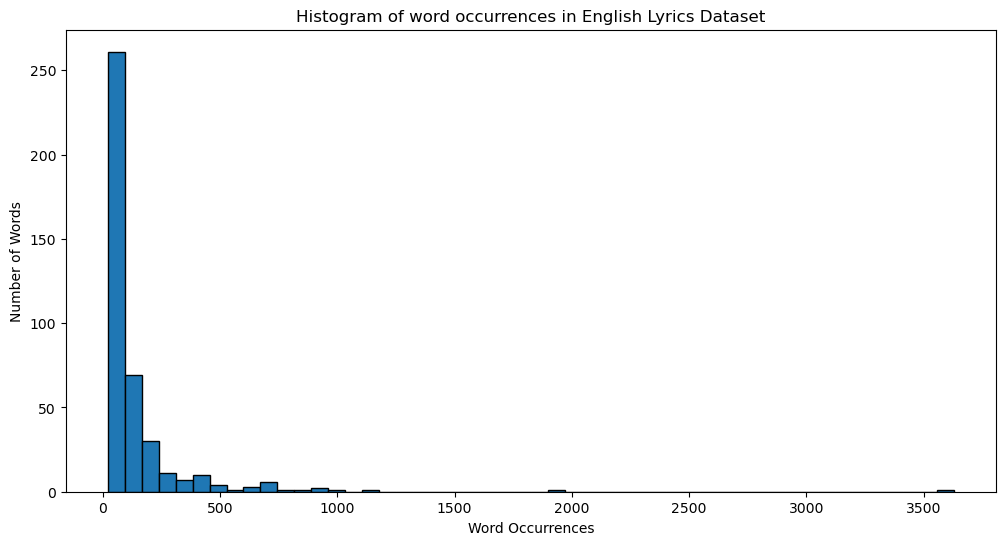

In [16]:
# Get the vocabulary (which is a list of words)
vocab = dataset.get_vocabulary()

# Get the documents (list of lyrics) from the dataset
documents = dataset.get_corpus()

# Initialize a dictionary to count occurrences
word_occurrences = defaultdict(int)

# Count the number of times each word in the vocabulary appears in the lyrics
for lyrics in documents:
    for word in vocab:
        word_occurrences[word] += lyrics.count(word)  # Count the occurrences of each vocabulary word

# Convert to DataFrame
word_count_df = pd.DataFrame.from_dict(word_occurrences, orient='index', columns=['count'])

# Reset index to have words as a separate column
word_count_df = word_count_df.reset_index().rename(columns={'index': 'word'})

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.hist(word_count_df['count'], bins=50, edgecolor='k')
plt.xlabel('Word Occurrences')
plt.ylabel('Number of Words')
plt.title('Histogram of word occurrences in English Lyrics Dataset') 
plt.show()



